<div align="center">
    <b style="font-size:68px">EPyODBC</b><br/>
    <span style="font-size:40px">Enhanced PyODBC with support for Jupyter Widgets</span>><br/>
    <span style="font-size:22px">04 September, 2020 | Prathyush SP</span>
</div>

# Why EPyODBC?

PyODBC is geared towards software developers with a focus on building enterprise applications.
<ul>
<li><b>Bridging Data Science</b> -  Data Scientists and Experimentalists have specific needs and to achieve the same using standard ORM tool can be an arduous task </li>

<li><b>GUI</b> - Graphical User Interface provides makes a job easy as it just takes a few clicks to learn about a feature</li>
</ul>

# Installation

```bash
pip install git+https://github.com/kingspp/epyodbc.git#egg=epyodbc
```

In [1]:
import epyodbc
print(epyodbc.__version__)

0.1.8


# Connect to a Database

In [2]:
# Import Database
from epyodbc import Database

# Using config
config = {
    "host": "0.0.0.0",
    "port": "1433",
    "database": 'master',
    "username": "SA",
    "password": "supersecurE1password13123"
}

# Create a Database object using config
db = Database(config=config)

Connected to DB Successfully


/Users/prathyushsp/anaconda3/envs/py36/lib/python3.6/site-packages/sqlalchemy/connectors/pyodbc.py:81: SAWarning: No driver name specified; this is expected by PyODBC when using DSN-less connections
  "No driver name specified; "


In [20]:
%load_ext autoreload
%autoreload 2
db?

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Type:           Database
String form:    <epyodbc.database.Database object at 0x7fee53628d68>
File:           ~/Git/arl/adhesives/epyodbc/src/epyodbc/database.py
Docstring:     
Database Class

PyODBC is geared towards software developers with a focus on building enterprise applications.
    * Bridging Data Science - Data Scientists and Experimentalists have specific needs and to achieve the same using standard ORM tool can be an arduous task
    * GUI - Graphical User Interface provides makes a job easy as it just takes a few clicks to learn about a feature
Init docstring:
Database Class constructor

:param config: Dictionary Based configuration. Required keys are "host", "port", "database", "username", "password"
:param config_file_path: Also supports file based configuration. The file should be in JSON format with the above keys.


In [3]:
# Connect to a Database using properties

# File path
from epyodbc import Database, EPYODBC_MODULE_PATH

# Create a Database object using config
db = Database(config_file_path=f'{EPYODBC_MODULE_PATH}/configs/local.json')

Loading server config from : /Users/prathyushsp/Git/arl/adhesives/epyodbc/src/epyodbc/configs/local.json
Connected to DB Successfully


In [4]:
# Connect to a Database using properties

# File path
from epyodbc import Database, EPYODBC_MODULE_PATH
import os

os.environ['EPYODBC_DBCONFIG'] = f'{EPYODBC_MODULE_PATH}/configs/local.json'

# Create a Database object using config
db = Database()

db?

Loading server config from : /Users/prathyushsp/Git/arl/adhesives/epyodbc/src/epyodbc/configs/local.json
Connected to DB Successfully


Type:        Database
String form: <epyodbc.database.Database object at 0x7fee53628d68>
File:        ~/Git/arl/adhesives/epyodbc/src/epyodbc/database.py
Docstring:       


# Lazy Evaluation, Table Autocompletion

In [5]:
# Get to know the columns
print(db.Adhesives_.columns)

# View a sample
db.Adhesives_.head()

Index(['distrlevel', 'whetherpublic', 'adhname', 'adhtype', 'adhform', 'lotid',
       'manufacturercode', 'expirationdate', 'tier', 'groupnum',
       'groupconfidence', 'safteysheetfilename', 'safetysheetfilesize',
       'techsheetfilename', 'techsheetfilesize', 'companyid'],
      dtype='object')


/Users/prathyushsp/anaconda3/envs/py36/lib/python3.6/site-packages/sqlalchemy/connectors/pyodbc.py:81: SAWarning: No driver name specified; this is expected by PyODBC when using DSN-less connections
  "No driver name specified; "


,distrlevel,whetherpublic,adhname,adhtype,adhform,lotid,manufacturercode,expirationdate,tier,groupnum,groupconfidence,safteysheetfilename,safetysheetfilesize,techsheetfilename,techsheetfilesize,companyid
adhid,,,,,,,,,,,,,,,,
1,None,None,Adhesive 1 ...,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,Adhesive 1 ...,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,Adhesive 1 ...,None,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,Adhesive 1 ...,None,None,None,None,None,None,None,None,None,None,None,None,None
5,None,None,Adhesive 1 ...,None,None,None,None,None,None,None,None,None,None,None,None,None


# Statistics

In [6]:
df = db.Adhesives_.compute()
df.describe()

/Users/prathyushsp/anaconda3/envs/py36/lib/python3.6/site-packages/sqlalchemy/connectors/pyodbc.py:81: SAWarning: No driver name specified; this is expected by PyODBC when using DSN-less connections
  "No driver name specified; "


,distrlevel,whetherpublic,adhname,adhtype,adhform,lotid,manufacturercode,expirationdate,tier,groupnum,groupconfidence,safteysheetfilename,safetysheetfilesize,techsheetfilename,techsheetfilesize,companyid
count,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0
unique,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
top,NaN,NaN,Adhesive 1 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Get Tables

In [7]:
db.tables

['Adhesives',
 'BondingPressure',
 'Cache',
 'Companies',
 'CrackExtensionTests',
 'CureCycle',
 'EnvironmentalTestChamber',
 'Instruments',
 'LoadCell',
 'Micrometer',
 'Oven',
 'SampleTest',
 'SingleLapJointTests',
 'TestFrame',
 'Users']

# Quick look at columns

In [8]:
db.Adhesives_.describe()

,distrlevel,whetherpublic,adhname,adhtype,adhform,lotid,manufacturercode,expirationdate,tier,groupnum,groupconfidence,safteysheetfilename,safetysheetfilesize,techsheetfilename,techsheetfilesize,companyid
npartitions=1,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


# Schema Visualization

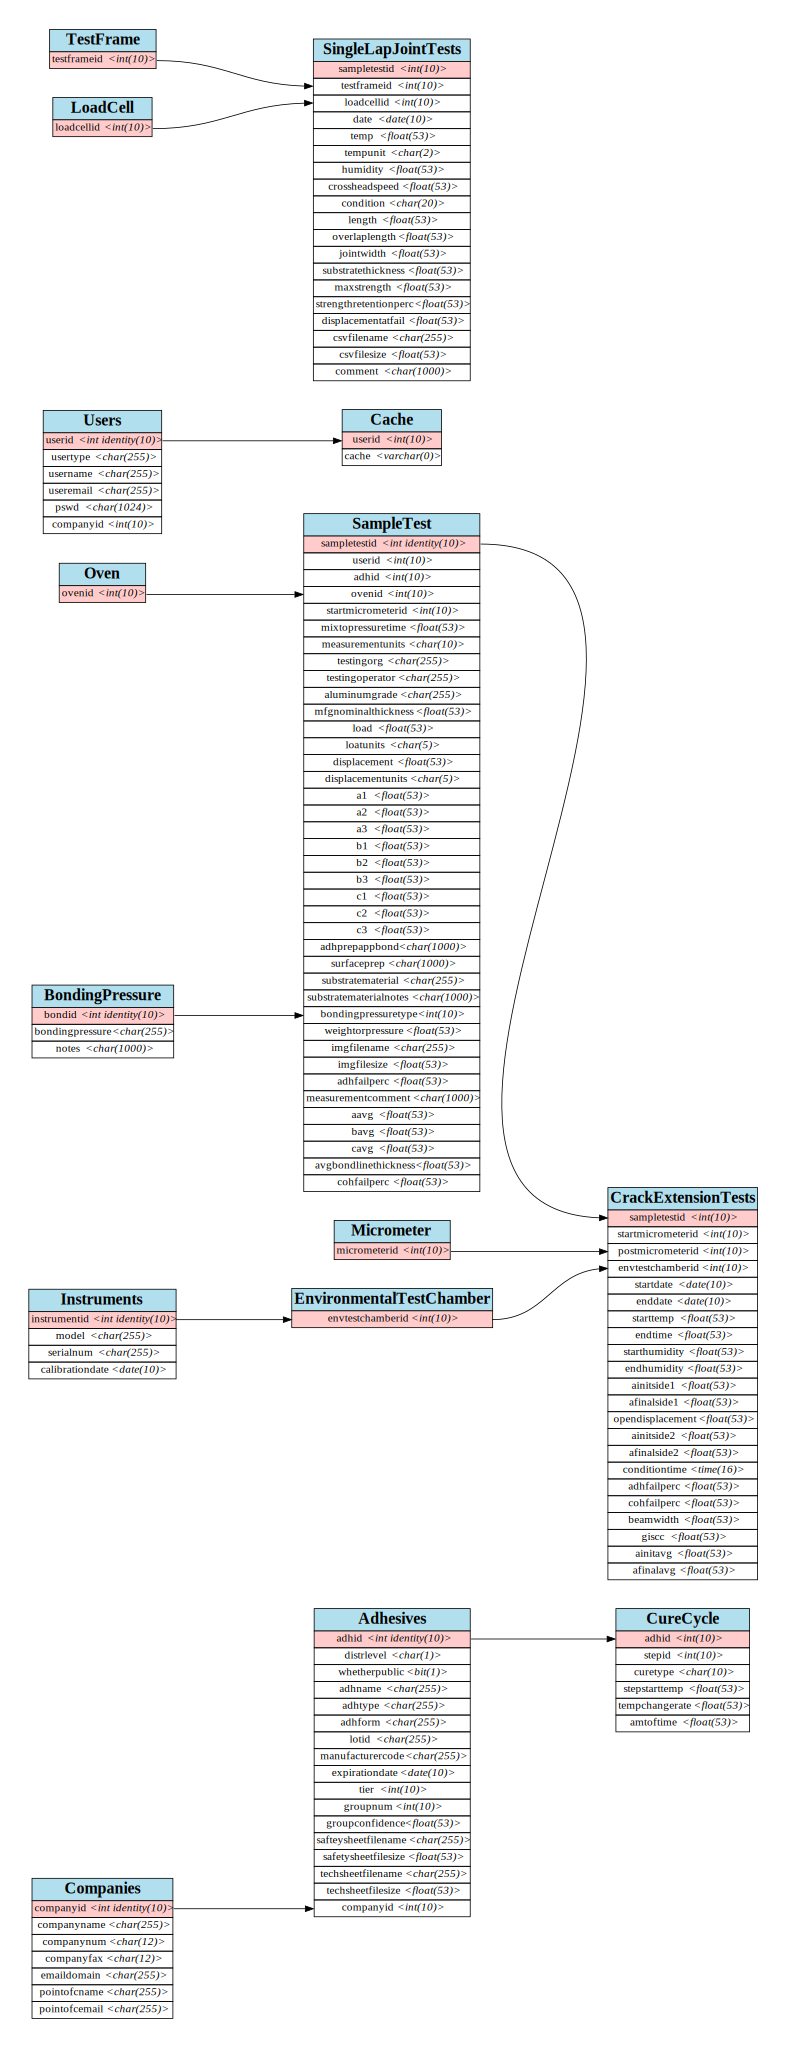

In [9]:
db.visualize()

# Table Names

In [10]:
db.describe()

<IPython.core.display.JSON object>

# Column Filter

In [11]:
db.describe()

<IPython.core.display.JSON object>

# Fast Query (DataFrame) (No Cursor)

In [12]:
db.query("SELECT * FROM Adhesives")

,adhid,distrlevel,whetherpublic,adhname,adhtype,adhform,lotid,manufacturercode,expirationdate,tier,groupnum,groupconfidence,safteysheetfilename,safetysheetfilesize,techsheetfilename,techsheetfilesize,companyid
0,1,None,None,Adhesive 1 ...,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2,None,None,Adhesive 1 ...,None,None,None,None,None,None,None,None,None,None,None,None,None
2,3,None,None,Adhesive 1 ...,None,None,None,None,None,None,None,None,None,None,None,None,None
3,4,None,None,Adhesive 1 ...,None,None,None,None,None,None,None,None,None,None,None,None,None
4,5,None,None,Adhesive 1 ...,None,None,None,None,None,None,None,None,None,None,None,None,None
5,6,None,None,Adhesive 1 ...,None,None,None,None,None,None,None,None,None,None,None,None,None
6,7,None,None,Adhesive 1 ...,None,None,None,None,None,None,None,None,None,None,None,None,None
7,8,None,None,Adhesive 1 ...,None,None,None,None,None,None,None,None,None,None,None,None,None


# Complex Query with a Cursor


In [13]:
for row in db.conn.execute("SELECT * FROM Adhesives"):
    print(row)

(1, None, None, 'Adhesive 1                                                                                                                                                                                                                                                     ', None, None, None, None, None, None, None, None, None, None, None, None, None)
(2, None, None, 'Adhesive 1                                                                                                                                                                                                                                                     ', None, None, None, None, None, None, None, None, None, None, None, None, None)
(3, None, None, 'Adhesive 1                                                                                                                                                                                                                                                     ', None, None, None, N

<div align="center">
    <b style="font-size:68px">Thank You</b><br/>
</div>